# Data Analysis on Smart Device Usage

### Background

Belabeat is an emerging tech manufacturer aiming to know the smart device usage habits from its customers. They plan to strategies the marketing based on the insights and want to know if it can help make better products. 

For this purpose they would like to use fitbit physical activity data from 30 users who consented to use it for research. Based on the insights gathered from this data, we will help make plans or recommended steps to make better products at Belabeat. 

The dataset consits of physical acitvity, sleep, steps, calories, active hours, hourly and minutes data along with heart rate. 


In [2]:
# imports

import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt

#### Daily activity analysis

In [3]:
# get current working directory
cwd = os.getcwd()

In [4]:
df_daily = pd.read_csv(cwd + "/data/dailyActivity_merged.csv")

In [5]:
# first few rows
df_daily.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
#shape of the data

df_daily.shape

(940, 15)

In [7]:
## general statistics

df_daily.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


#### Check for null values

In [12]:
df_daily.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Few points to notice:

1. The data seems to be complete, there are 940 entries for all the columns.
2. The minimum for all columns is zero. Calories cannot be zero, there might be outliers or some ids which might not have used the device on that day.
3. Total distance and Tracker distance both are same. We can ignore TrackerDistance for our ease of analysis.

In [22]:
print(str(len(df_daily.Id.unique()))+" total users")

33 total users


In [23]:
## histograms of different metrics

<AxesSubplot:xlabel='Calories', ylabel='Count'>

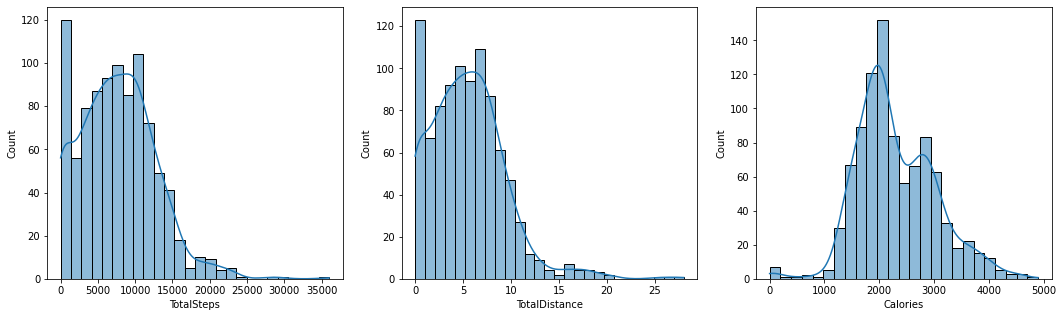

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.histplot(data= df_daily, x="TotalSteps", ax=ax[0], kde=True)
sns.histplot(data= df_daily, x="TotalDistance",ax=ax[1], kde=True)
sns.histplot(data= df_daily, x="Calories",ax=ax[2], kde=True )



In [91]:
#check the datatypes 
df_daily.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [97]:
#change the object data type of date to Datetime

import datetime as dt

df_daily.ActivityDate = pd.to_datetime(df_daily['ActivityDate'])

In [105]:
df_daily['weekday'] = df_daily.ActivityDate.dt.weekday


In [122]:
# replacing the weekday numbers to day names
df_daily['weekday'].replace({0:"Monday", 1:"Tuesday", 2:"Wednesday", 3:"Thursday", 4:"Friday", 5:"Saturday", 6:"Sunday"}, inplace=True)

In [123]:
df_daily['weekday']

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
935       Sunday
936       Monday
937      Tuesday
938    Wednesday
939     Thursday
Name: weekday, Length: 940, dtype: object

<AxesSubplot:xlabel='weekday', ylabel='TotalSteps'>

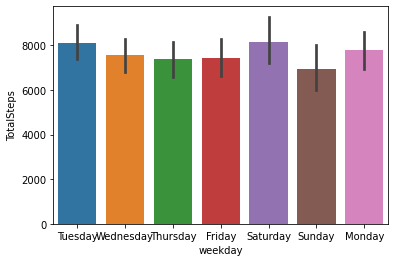

In [124]:
#lets see which day has the maximum steps

sns.barplot(data=df_daily, x="weekday", y="TotalSteps")